In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.figure_factory as ff

In [6]:
data = pd.read_csv('poverty.csv')

In [7]:
print(data)

       ind_id                                     ind_definition reportyear  \
0         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
1         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
2         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
3         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
4         754  Overall, Concentrated, and Child (under 18 yea...  2011-2015   
...       ...                                                ...        ...   
32000     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32001     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32002     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32003     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   
32004     754  Overall, Concentrated, and Child (under 18 yea...  2012-2016   

       race_eth_code race_eth_name geotype  geotype

In [4]:
estimate_by_county = data.loc[data['race_eth_name'] == 'Total'][['estimate', 'county_name']]
estimate_by_county = estimate_by_county.dropna()
avg_est_county = estimate_by_county.groupby('county_name').mean()

top10_est_county = avg_est_county.sort_values(by=['estimate'], ascending=False).head(10)
print(top10_est_county)

              estimate
county_name           
Tulare       61.832955
Merced       55.738610
Imperial     53.720610
Del Norte    52.710133
Kings        52.524742
Fresno       51.828524
Siskiyou     51.662894
Kern         48.986472
Lake         48.910338
Madera       48.178853


Text(0.5, 1.0, 'top 10 county with respective estimated poverty percentage')

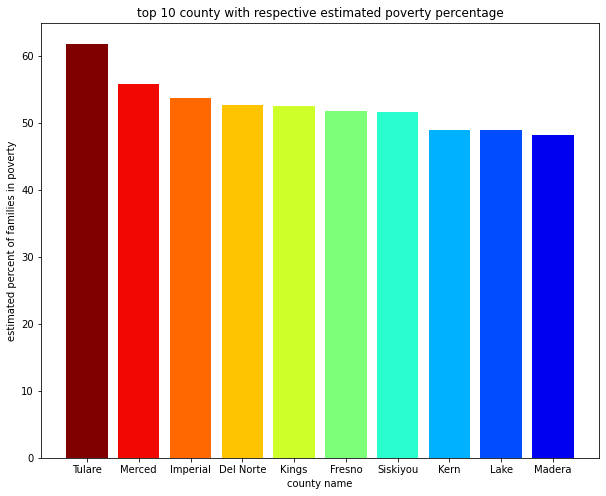

In [5]:
plt.figure(figsize=(10, 8))

x = list(top10_est_county.index)
y = top10_est_county['estimate']
for i in range(len(x)):
    plt.bar(x[i], y[i], color=cm.jet(1. * (len(x) - i) / len(x)))
    
plt.xlabel('county name')
plt.ylabel('estimated percent of families in poverty')
plt.title('top 10 county with respective estimated poverty percentage')

In [6]:
estimate_by_race = data[['estimate', 'race_eth_name']]
estimate_by_race = estimate_by_race.dropna()
avg_est_race = estimate_by_race.groupby('race_eth_name').mean()

# top10_est_county = avg_est_county.sort_values(by=['estimate'], ascending=False).head(10)
print(avg_est_race)

                estimate
race_eth_name           
AIAN           56.243495
AfricanAm      47.645574
Asian          27.753202
Latino         49.722367
Multiple       30.987263
NHOPI          57.114103
Other          50.491672
Total          36.837857
White          25.433010


Text(0.5, 1.0, 'percentage of families in poverty over different races')

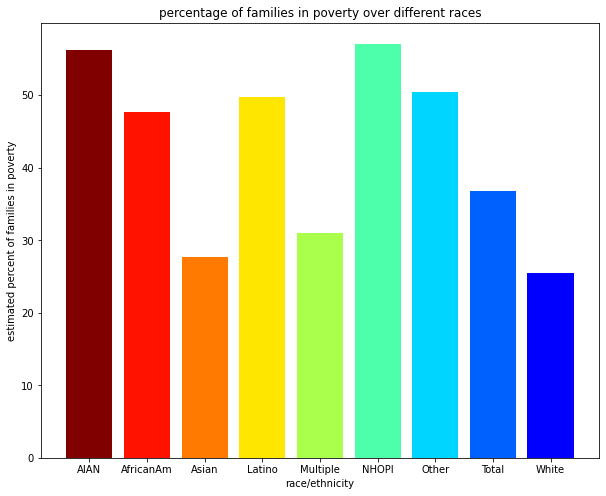

In [7]:
plt.figure(figsize=(10, 8))

x = list(avg_est_race.index)
y = avg_est_race['estimate']
for i in range(len(x)):
    plt.bar(x[i], y[i], color=cm.jet(1. * (len(x) - i) / len(x)))
    
plt.xlabel('race/ethnicity')
plt.ylabel('estimated percent of families in poverty')
plt.title('percentage of families in poverty over different races')

In [19]:
estimate_by_county = data.loc[data['race_eth_name'] == 'Total'][['estimate', 'county_name']]
estimate_by_county = estimate_by_county.dropna()
avg_est_county = estimate_by_county.groupby('county_name').mean()

In [20]:
print(avg_est_county)

                  estimate
county_name               
Alameda          27.836576
Alpine           35.740557
Amador           29.704160
Butte            44.470201
Calaveras        30.379899
Colusa           43.709902
Contra Costa     24.393524
Del Norte        52.710133
El Dorado        26.681224
Fresno           51.828524
Glenn            46.317511
Humboldt         43.727558
Imperial         53.720610
Inyo             28.096828
Kern             48.986472
Kings            52.524742
Lake             48.910338
Lassen           34.049759
Los Angeles      40.380822
Madera           48.178853
Marin            18.651370
Mariposa         31.351878
Mendocino        45.182516
Merced           55.738610
Modoc            47.239925
Mono             27.889019
Monterey         40.084181
Napa             28.205422
Nevada           29.563325
Orange           27.972899
Placer           23.798899
Plumas           33.564664
Riverside        40.619336
Sacramento       37.809985
San Benito       29.657372
S

In [26]:
print(avg_est_county.mean() + 2 * avg_est_county.std())

estimate    58.095918
dtype: float64


Text(0.5, 1.0, 'poverty heatmap by region')

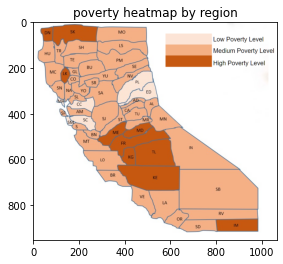

In [11]:
poverty_heatmap = plt.imread('./poverty_heatmap.png')
plt.imshow(poverty_heatmap)
plt.title('poverty heatmap by region')

In [28]:
estimate_by_county = data.loc[data['race_eth_name'] == 'Total'][['estimate', 'county_name', 'county_fips']]
estimate_by_county = estimate_by_county.dropna()
avg_est_county = estimate_by_county.groupby('county_name').mean()
avg_est_county['county_fips'] = avg_est_county['county_fips'].astype(int)

In [29]:
print(avg_est_county)

                  estimate  county_fips
county_name                            
Alameda          27.836576         6001
Alpine           35.740557         6003
Amador           29.704160         6005
Butte            44.470201         6007
Calaveras        30.379899         6009
Colusa           43.709902         6011
Contra Costa     24.393524         6013
Del Norte        52.710133         6015
El Dorado        26.681224         6017
Fresno           51.828524         6019
Glenn            46.317511         6021
Humboldt         43.727558         6023
Imperial         53.720610         6025
Inyo             28.096828         6027
Kern             48.986472         6029
Kings            52.524742         6031
Lake             48.910338         6033
Lassen           34.049759         6035
Los Angeles      40.380822         6037
Madera           48.178853         6039
Marin            18.651370         6041
Mariposa         31.351878         6043
Mendocino        45.182516         6045


In [47]:
values = avg_est_county['estimate'].tolist()
fips = avg_est_county['county_fips'].tolist()
color = ['#c35b7e' , '#910736', '#866ba8', '#f13710', '#f8c928', '#ff8817']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[17.394022, 27.569496, 37.74497, 47.920444, 58.095918],
    colorscale=color,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Poverty Level by County', title='California Poverty Level by County'
)
fig.layout.template = None
fig.show()

In [34]:
county_food_inse = pd.read_csv('county food insercuity in CA.csv')

In [41]:
print(county_food_inse['percent'].mean() + 2 * county_food_inse['percent'].std())

17.740770877333055


In [45]:
values = county_food_inse['percent'].tolist()
fips = county_food_inse['fips'].tolist()
color = ['#c35b7e' , '#910736', '#866ba8', '#f13710', '#f8c928', '#ff8817']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[6.100608433011778, 9.010649044092098, 11.920689655172417, 14.830730266252736, 17.740770877333055],
    colorscale=color,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Food Insecurity Percentage by County', title='California Food Insecurity Percentage by County'
)
fig.layout.template = None
fig.show()